In [61]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


IMPORTING THE DATASET

In [62]:
data =pd.read_csv("heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [64]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [65]:
data.shape

(1025, 14)

In [66]:
print("Numder of Rows",data.shape[0])
print("Numder of Columns",data.shape[1])

Numder of Rows 1025
Numder of Columns 14


In [67]:
data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [68]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [84]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp-risk
target,,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.248497
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,0.768061


GETTING THE INPUTS AND OUTPUTS

In [85]:
X = df.drop(columns = 'target', axis = 1)
Y = df['target']

In [86]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp-risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [87]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [88]:
#Data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

SPLIT DATA IN TRAIN AND TEST

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y,random_state = 2)

DATA VISUALIZATION

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

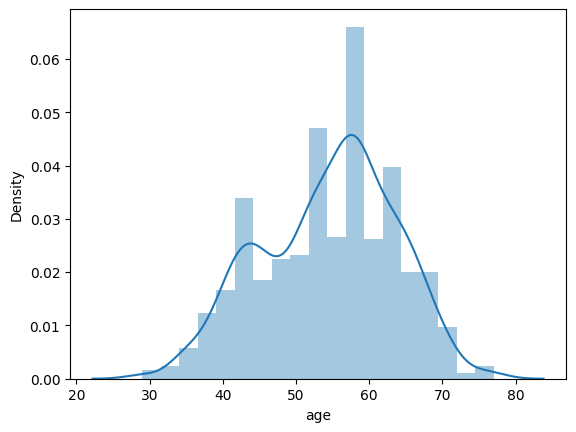

In [73]:
sns.distplot(data['age'])
plt.show()

This plot show age Distribution in the Dataset and It has been shown that the highest percentage of people suffering from heart disease are those between the ages of 50 and 60 years.

<Axes: >

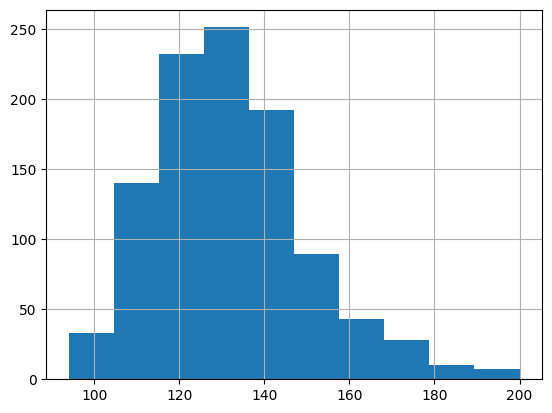

In [74]:
data['trestbps'].hist()

This plot show Resting Blood Pressure Distrbution in the Dataset

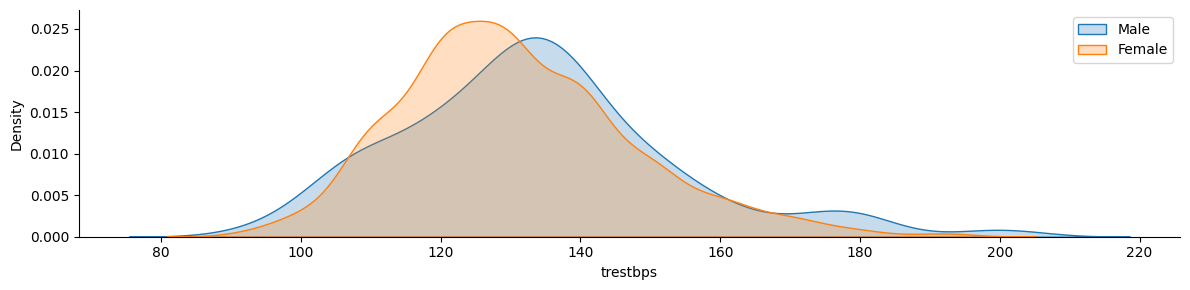

In [75]:
g=sns.FacetGrid(data , hue = "sex" , aspect =4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

This plot show comparing between Resting Blood Pessure as per sex coulmns so the female is higher ( which is red color) and male lower than (which is green color)

In [76]:
cate_val=[]
cont_val=[]
for columns in data.columns:
    if data[columns].nunique() <=10:
        cate_val.append(columns)
    else:
        cont_val.append(columns)
    

In [77]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [78]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

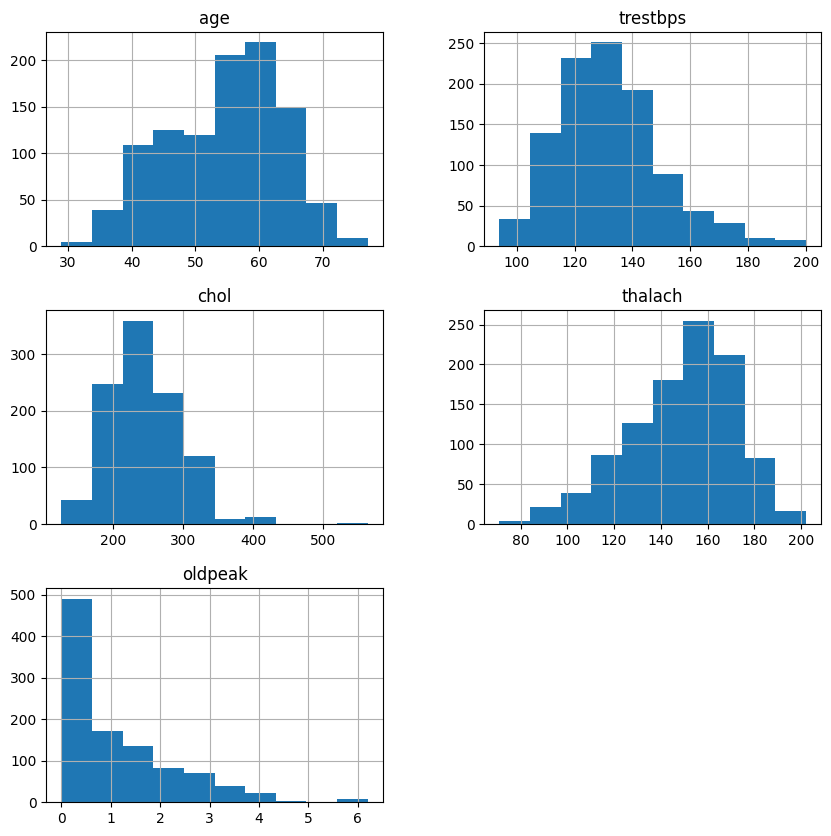

In [79]:
data.hist(cont_val,figsize=(10,10))

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

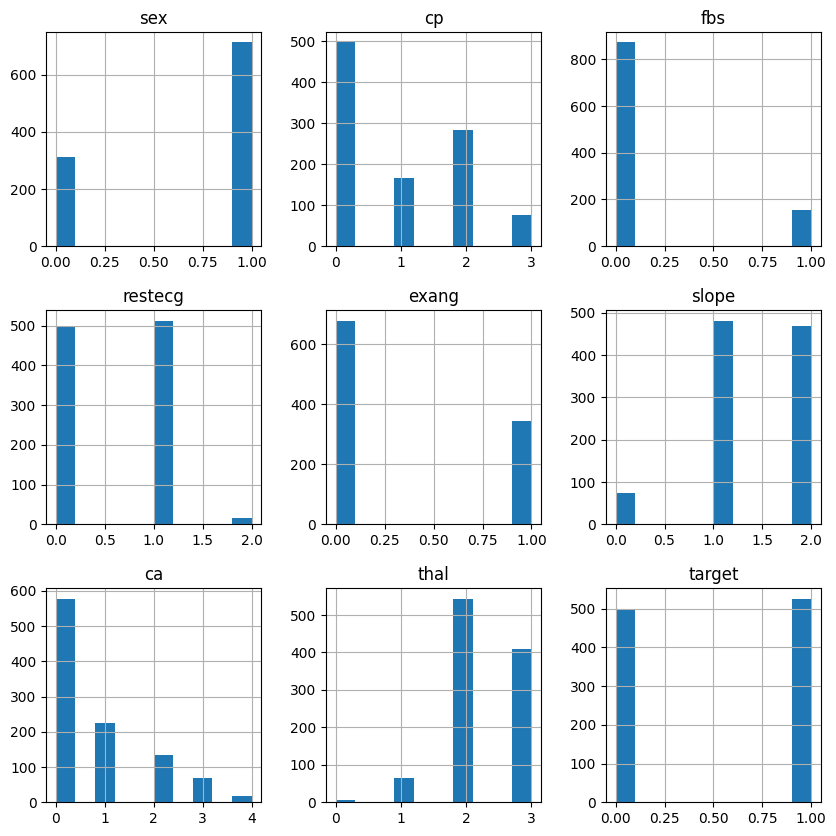

In [80]:
data.hist(cate_val ,figsize=(10,10))

In [81]:
correlation_matrix=data.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

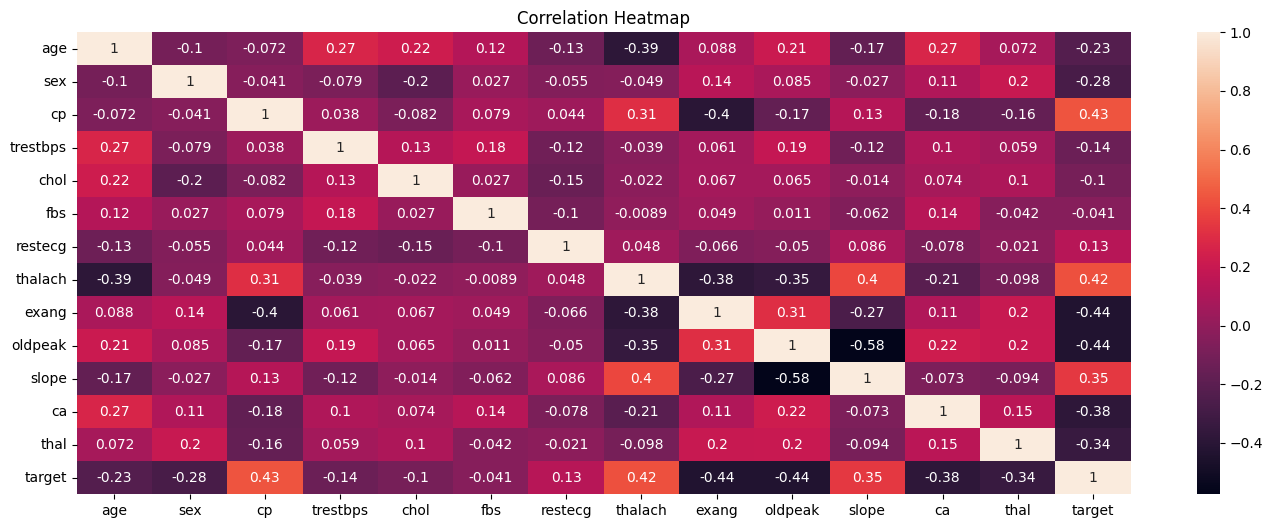

In [82]:
plt.figure(figsize=(17, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

These correlations provide insights into which factors are most influential in predicting heart disease and can guide the development of predictive models

-age:

Positively correlated with trestbps (0.283), chol (0.207), and ca (0.302), indicating that older age is associated with higher resting blood pressure, higher cholesterol, and more major vessels colored by fluoroscopy. Negatively correlated with thalach (-0.395), indicating that older age is associated with lower maximum heart rate achieved. Negatively correlated with target (-0.221), indicating that older age is associated with a lower likelihood of having heart disease (though this might be counterintuitive and could indicate a complex relationship or influence of other factors).

-sex:

Negatively correlated with chol (-0.196) and target (-0.284), indicating that females are less likely to have higher cholesterol and heart disease compared to males. cp (chest pain type):

Positively correlated with thalach (0.293) and target (0.432), indicating that certain types of chest pain are associated with higher maximum heart rate achieved and a higher likelihood of heart disease. Negatively correlated with exang (-0.393), indicating that certain types of chest pain are less likely to be associated with exercise-induced angina.

-trestbps:

Positively correlated with oldpeak (0.195), indicating higher resting blood pressure is associated with higher ST depression induced by exercise. Negatively correlated with target (-0.146), indicating higher resting blood pressure is associated with a lower likelihood of heart disease (again, this could indicate a complex relationship or the influence of other factors).

-thalach:

Positively correlated with cp (0.293) and target (0.420), indicating higher maximum heart rate achieved is associated with certain types of chest pain and a higher likelihood of heart disease. Negatively correlated with age (-0.395), exang (-0.377), and oldpeak (-0.342), indicating that lower maximum heart rate achieved is associated with older age, exercise-induced angina, and higher ST depression induced by exercise.

-exang:

Positively correlated with oldpeak (0.287), indicating that exercise-induced angina is associated with higher ST depression induced by exercise. Negatively correlated with cp (-0.393), thalach (-0.377), and target (-0.436), indicating that exercise-induced angina is associated with certain types of chest pain, lower maximum heart rate achieved, and a lower likelihood of heart disease.

-oldpeak:

Positively correlated with exang (0.287) and ca (0.237), indicating higher ST depression induced by exercise is associated with exercise-induced angina and more major vessels colored by fluoroscopy. Negatively correlated with thalach (-0.342), slope (-0.576), and target (-0.429), indicating that higher ST depression induced by exercise is associated with lower maximum heart rate achieved, less favorable slope of the peak exercise ST segment, and a lower likelihood of heart disease.

-ca:

Positively correlated with age (0.302), exang (0.125), and oldpeak (0.237), indicating more major vessels colored by fluoroscopy are associated with older age, exercise-induced angina, and higher ST depression induced by exercise. Negatively correlated with thalach (-0.228) and target (-0.409), indicating that more major vessels colored by fluoroscopy are associated with lower maximum heart rate achieved and a lower likelihood of heart disease.

-thal:

Positively correlated with sex (0.211), indicating a gender difference in thalassemia. Negatively correlated with target (-0.343), indicating that certain thalassemia conditions are associated with a lower likelihood of heart disease.

MODEL EVALUATION

In [89]:
#Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [92]:
model.fit(X_train, Y_train)

LogisticRegression()

In [97]:
#Finding the accuracy score on training dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [94]:
train_data_accuracy

0.8548780487804878

In [100]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [96]:
test_data_accuracy

0.8146341463414634